<a href="https://colab.research.google.com/github/arindam9999/Color_picker_RESTful_API/blob/master/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
PATH = "/gdrive/My Drive/wikilimo/deepfuel-preprocessed-data/"

In [ ]:
# !gsutil -m cp -r gs://deepfuel-preprocessed-data '/gdrive/My Drive/wikilimo'


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
!pip install netcdf4

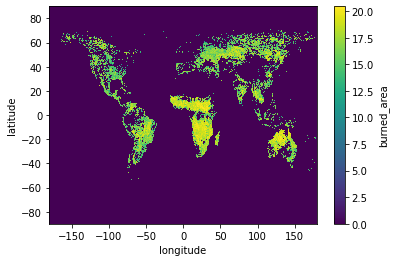

In [9]:
# Working on the ARIMA Model
burnt_area_data_array = burnt_area_data.burned_area
burnt_area_data_array_max = burnt_area_data_array.max(dim = 'time')
# burnt_area_data_array.sel(time = str(burnt_area_data.time.values[11])).plot()
burnt_area_data_array_max.plot()
# for longitude in burnt_area_data_array.longitude.values[0:700:30]:
#   burnt_area_data_array.sel(latitude = float(-10.125), longitude = longitude ).plot()


In [3]:
wa = xarray.open_dataset(PATH + "weather_anomalies2010-2016.nc")
agb = xarray.open_dataset(PATH + "agb_avitabile2010-2016.nc")
slope = xarray.open_dataset(PATH + "slopes_data.nc")
fa = xarray.open_dataset(PATH + "fire_anomalies_data2010_2016.nc")
clr = xarray.open_dataset(PATH + "climatic_regions_rounded_off_data.nc")
baf = xarray.open_dataset(PATH + "ba_fraction_only2010-2016.nc")
bao = xarray.open_dataset(PATH + "burned_area_only2010-2016_logtransform.nc")


In [ ]:
# Creating the Dataset

def row_data_creator(data_array):
  X = np.ndarray([])
  T = np.ndarray([])
  for i, time in enumerate(data_array.time.values):
    time = str(time)
    d = data_array.sel(time = str(time)).values.astype(np.float16)
    d = d.reshape(1,-1)
    X = np.append(X,d)
    t = np.full(d.shape, i).astype(np.int8)
    T = np.append(T,t)
  X = X.reshape(-1,1)
  T = T.reshape(-1,1)
  return X,T


def data_creator(array_list):
  Y = np.ndarray([])
  X, T = row_data_creator(array_list[0])
  Y = np.copy(X)
  Y = np.concatenate((Y,T), axis = 1)
  for data_array in array_list[1:]:
    X, _  = row_data_creator(data_array)
    Y = np.concatenate((Y,X), axis = 1)
    print(Y.shape)
  X = None
  T = None

  return Y

array_list = [
              wa.erate,
              wa.t2m,
              wa.d2m,
              wa.si10,
              wa.fg10,
              wa.swvl1,
              wa.tprate,
              agb.abg_avitabile_vodmean,
              agb.abg_avitabile_vod5th,
              agb.abg_avitabile_vod95th,
              slope.slor,
              fa.fwinx,
              fa.drtcode,
              fa.fdsrte,
              clr.climatic_region,
              baf.fraction_of_burnable_area,
              bao.burned_area,
              ]
data = data_creator(array_list)




(87091201, 3)
(87091201, 4)
(87091201, 5)
(87091201, 6)
(87091201, 7)
